In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [2]:
#importação das planilhas csv para serem dataframes
df1000 = pd.read_csv("dataset_sudeste_realista_outliers-1K.csv")

In [3]:
df1000.columns.tolist() #listar colunas de tabela de 1000 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [4]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df1000['idade'] = df1000['idade'].fillna(0)
df1000['renda'] = df1000['renda'].fillna(0)
df1000['cidade'] = df1000['cidade'].fillna(0)
df1000['categoria'] = df1000['categoria'].fillna(0)
df1000['nota'] = df1000['nota'].fillna(0)
df1000['feedback'] = df1000['feedback'].fillna(0)

In [5]:
#feedbackisualização de tabela tratada de 1000 linhas
display(df1000.head(1000))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,33.0,23998.60,São Paulo,B,5.4,Bom
1,2,30.0,32347.35,Vitória,A,7.3,Bom
2,3,27.0,19521.96,São Paulo,B,6.2,Bom
3,4,54.0,3828.07,Vitória,A,6.3,Bom
4,5,61.0,39322.37,Vitória,A,5.9,Bom
...,...,...,...,...,...,...,...
995,996,72.0,43941.58,São Paulo,A,8.5,Bom
996,997,62.0,13561.95,Rio de Janeiro,A,5.5,Bom
997,998,68.0,46246.25,São Paulo,A,7.0,Bom
998,999,17.0,21589.09,São Paulo,A,8.9,Bom


In [6]:
# Média, mínimo, máximo, quartis, margem de erro, contagem
print("\n### Descrição Estatística 1000###")
print(df1000.describe())


### Descrição Estatística 1000###
                id        idade         renda         nota
count  1000.000000  1000.000000   1000.000000  1000.000000
mean    500.500000    48.834000  24237.116310     7.312200
std     288.819436    20.440309  13627.657493     1.762401
min       1.000000     0.000000      0.000000     0.000000
25%     250.750000    32.000000  13020.792500     6.100000
50%     500.500000    48.500000  24391.645000     7.400000
75%     750.250000    66.000000  35389.782500     8.700000
max    1000.000000   119.000000  89526.570000    10.000000


In [7]:
# Cálculos Estatísticos de idade
media_idade1000 = sum(df1000['idade'])/len(df1000['idade'])
mediana_idade1000 = df1000['idade'].median()
desvio_padrao_idade1000 = df1000['idade'].std()
maximo_idade1000 = df1000['idade'].max()
minimo_idade1000 = df1000['idade'].min()

print('Média de Idade - 1000 Elementos:',round(media_idade1000,0))
print('Mediana de Idade - 1000 Elementos:',round(mediana_idade1000,0))
print('Desvio Padrão de Idade - 1000 Elementos:',round(desvio_padrao_idade1000,0))
print('Maior Valor de Idade - 1000 Elementos:',round(maximo_idade1000,0))
print('Menor Valor de Idade - 1000 Elementos:',round(minimo_idade1000,0))

Média de Idade - 1000 Elementos: 49.0
Mediana de Idade - 1000 Elementos: 48.0
Desvio Padrão de Idade - 1000 Elementos: 20.0
Maior Valor de Idade - 1000 Elementos: 119.0
Menor Valor de Idade - 1000 Elementos: 0.0


In [8]:
# Cálculos Estatísticos de renda
media_renda1000 = sum(df1000['renda'])/len(df1000['renda'])
mediana_renda1000 = df1000['renda'].median()
desvio_padrao_renda1000 = df1000['renda'].std()
maximo_renda1000 = df1000['renda'].max()
minimo_renda1000 = df1000['renda'].min()

print('Média de Renda - 1000 Elementos:',round(media_renda1000,2))
print('Mediana de Renda - 1000 Elementos:',round(mediana_renda1000,2))
print('Desvio Padrão de Renda - 1000 Elementos:',round(desvio_padrao_renda1000,2))
print('Maior Valor de Renda - 1000 Elementos:',round(maximo_renda1000,2))
print('Menor Valor de Renda - 1000 Elementos:',round(minimo_renda1000,2))

Média de Renda - 1000 Elementos: 24237.12
Mediana de Renda - 1000 Elementos: 24391.64
Desvio Padrão de Renda - 1000 Elementos: 13627.66
Maior Valor de Renda - 1000 Elementos: 89526.57
Menor Valor de Renda - 1000 Elementos: 0.0


In [9]:
# Cálculos Estatísticos de nota
media_nota1000 = sum(df1000['nota'])/len(df1000['nota'])
mediana_nota1000 = df1000['nota'].median()
desvio_padrao_nota1000 = df1000['nota'].std()
maximo_nota1000 = df1000['nota'].max()
minimo_nota1000 = df1000['nota'].min()

print('Média de Nota - 1000 Elementos:',round(media_nota1000,2))
print('Mediana de Nota - 1000 Elementos:',round(mediana_nota1000,2))
print('Desvio Padrão de Nota - 1000 Elementos:',round(desvio_padrao_nota1000,2))
print('Maior Valor de Nota - 1000 Elementos:',round(maximo_nota1000,2))
print('Menor Valor de Nota - 1000 Elementos:',round(minimo_nota1000,2))

Média de Nota - 1000 Elementos: 7.31
Mediana de Nota - 1000 Elementos: 7.4
Desvio Padrão de Nota - 1000 Elementos: 1.76
Maior Valor de Nota - 1000 Elementos: 10.0
Menor Valor de Nota - 1000 Elementos: 0.0


In [10]:
#Calculando o IQR e identificando os limites - Renda
Q1_renda1000 = df1000['renda'].quantile(0.25)
Q3_renda1000 = df1000['renda'].quantile(0.75)
IQR_renda1000 = Q3_renda1000 - Q1_renda1000
limite_inferior_renda1000 = Q1_renda1000 - 1.5 * IQR_renda1000
limite_superior_renda1000 = Q3_renda1000 + 1.5 * IQR_renda1000

print (f"\n\n\t IQR - Campo Renda - 1000\n\n")
print(f"Quartis -> Q1: {Q1_renda1000:-8.2f}  ->  Q3: {Q3_renda1000:-8.2f}")
print(f"IQR ----- {IQR_renda1000}")
print(f"Limites - Inf: {limite_inferior_renda1000:-8.2f}  -> Sup: {limite_superior_renda1000:-8.2f}")



	 IQR - Campo Renda - 1000


Quartis -> Q1: 13020.79  ->  Q3: 35389.78
IQR ----- 22368.99
Limites - Inf: -20532.69  -> Sup: 68943.27


In [11]:
#Calculando o IQR e identificando os limites - Idade
Q1_idade1000 = df1000['idade'].quantile(0.25)
Q3_idade1000 = df1000['idade'].quantile(0.75)
IQR_idade1000 = Q3_idade1000 - Q1_idade1000
limite_inferior_idade1000 = Q1_idade1000 - 1.5 * IQR_idade1000
limite_superior_idade1000 = Q3_idade1000 + 1.5 * IQR_idade1000

print (f"\n\n\t IQR - Campo Idade - 1000\n\n")
print(f"Quartis -> Q1: {Q1_idade1000:-8.2f}  ->  Q3: {Q3_idade1000:-8.2f}")
print(f"IQR ----- {IQR_idade1000}")
print(f"Limites - Inf: {limite_inferior_idade1000:-8.2f}  -> Sup: {limite_superior_idade1000:-8.2f}")



	 IQR - Campo Idade - 1000


Quartis -> Q1:    32.00  ->  Q3:    66.00
IQR ----- 34.0
Limites - Inf:   -19.00  -> Sup:   117.00


In [12]:
#Calculando o IQR e identificando os limites - Nota
Q1_nota1000 = df1000['nota'].quantile(0.25)
Q3_nota1000 = df1000['nota'].quantile(0.75)
IQR_nota1000 = Q3_nota1000 - Q1_nota1000
limite_inferior_nota1000 = Q1_nota1000 - 1.5 * IQR_nota1000
limite_superior_nota1000 = Q3_nota1000 + 1.5 * IQR_nota1000

print (f"\n\n\t IQR - Campo Nota - 1000\n\n")
print(f"Quartis -> Q1: {Q1_nota1000:-8.2f}  ->  Q3: {Q3_nota1000:-8.2f}")
print(f"IQR ----- {IQR_nota1000}")
print(f"Limites - Inf: {limite_inferior_nota1000:-8.2f}  -> Sup: {limite_superior_nota1000:-8.2f}")



	 IQR - Campo Nota - 1000


Quartis -> Q1:     6.10  ->  Q3:     8.70
IQR ----- 2.5999999999999996
Limites - Inf:     2.20  -> Sup:    12.60


In [13]:
#Outliers Renda
outliers_renda1000 = df1000[(df1000['renda'] < limite_inferior_renda1000) | (df1000['renda'] > limite_superior_renda1000)]
print(f"\n### Possíveis Outliers em 'renda' - 1000 Elementos###\n\n{outliers_renda1000}\n\n\n")


### Possíveis Outliers em 'renda' - 1000 Elementos###

      id  idade     renda     cidade categoria  nota feedback
27    28   83.0  78193.38  São Paulo         A   1.0      Bom
475  476   89.0  77512.53  São Paulo         A   2.3      Bom
540  541    2.0  84166.00  São Paulo         A   4.7      Bom
742  743  107.0  89526.57  São Paulo         A   3.2      Bom





In [14]:
#Outliers Idade
outliers_idade1000 = df1000[(df1000['idade'] < limite_inferior_idade1000) | (df1000['idade'] > limite_superior_idade1000)]
print(f"\n### Possíveis Outliers em 'idade' - 1000 Elementos###\n\n{outliers_idade1000}\n\n\n")


### Possíveis Outliers em 'idade' - 1000 Elementos###

      id  idade    renda     cidade categoria  nota feedback
829  830  119.0  1139.86    Vitória         A   0.7      Bom
853  854  118.0   778.72  São Paulo         A   1.5      Bom





In [15]:
#Outliers Nota
outliers_nota1000 = df1000[(df1000['nota'] < limite_inferior_nota1000) | (df1000['nota'] > limite_superior_nota1000)]
print(f"\n### Possíveis Outliers em 'nota' - 1000 Elementos###\n\n{outliers_nota1000}\n\n\n")


### Possíveis Outliers em 'nota' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
13    14   68.0  20769.09       São Paulo         B   0.0        0
27    28   83.0  78193.38       São Paulo         A   1.0      Bom
46    47   22.0  30040.14  Rio de Janeiro         A   0.0        0
120  121   45.0  39322.34         Vitória         A   0.0        0
198  199   75.0  38457.64       São Paulo         B   0.0        0
201  202    8.0    459.89  Rio de Janeiro         A   0.4      Bom
230  231   52.0  43480.43  Rio de Janeiro         A   0.0        0
272  273   27.0  37421.66         Vitória         A   0.0        0
316  317   45.0  23263.48  Rio de Janeiro         A   0.0        0
369  370   43.0   5814.46       São Paulo         A   0.0        0
410  411   91.0  60402.51         Vitória         A   1.0      Bom
607  608   65.0  34730.45       São Paulo         A   0.0        0
632  633   84.0  58443.47       São Paulo         A   1.3      Bom
791  79

In [21]:
#Conversão da planilha tratada para csv
df1000.to_csv('Realista1000_Tratado.csv', index=False)

In [22]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo1000 = df1000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Realista1000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo1000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!


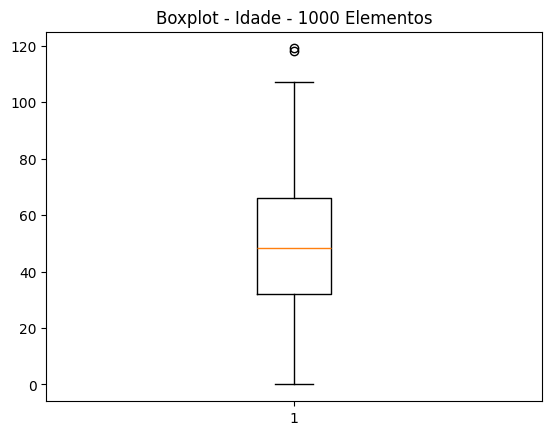

In [18]:
#Geração Gráfico - Idade - 1000 linhas
plt.boxplot(df1000['idade'])
plt.title("Boxplot - Idade - 1000 Elementos")
plt.show()

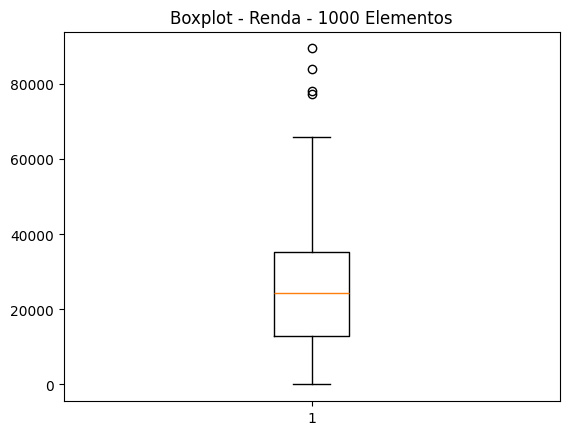

In [19]:
#Geração Gráfico - Renda - 1000 linhas
plt.boxplot(df1000['renda'])
plt.title("Boxplot - Renda - 1000 Elementos")
plt.show()

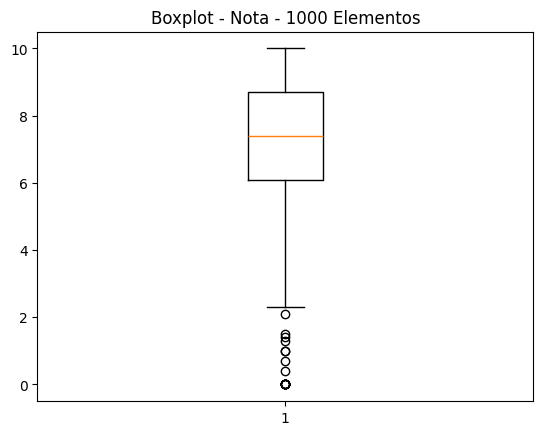

In [20]:
#Geração Gráfico - Nota - 1000 linhas
plt.boxplot(df1000['nota'])
plt.title("Boxplot - Nota - 1000 Elementos")
plt.show()